In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:

missing = [' ']
eurusdH4 = pd.read_csv("EuroGBP_H1.csv", na_values = missing)
eurusdH4.dropna(inplace = True)
print(eurusdH4.shape)
mean = eurusdH4['Mean']
low = eurusdH4['Low']
high = eurusdH4['High']

(19667, 16)


In [3]:
X = eurusdH4.values[:,3:15]

In [4]:
X[1][0]

0.8910899999999999

In [5]:
lowX_train, lowX_test, lowy_train, lowy_test = train_test_split(
    X, low, test_size=0.1, random_state=0)

In [6]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:15]]


# X=X._values
# y=y._values

LRmodel.fit(lowX_train, lowy_train)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
lowY_hat = LRmodel.predict(lowX_train)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(lowX_train))}).join(pd.DataFrame(lowX_train))
dfDirty = newX+0.00001*np.random.rand(len(newX['Constant']), 13)
newX = dfDirty
RSS= sum((lowy_train-lowY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((lowy_train-Y_bar)**2)
MSE = (sum((lowy_train - lowY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(lowX_train))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )


RSS : 68032439.20029882
MSE : 3846.4657206026354
   Coefficient Names  Coefficient  Std. Error  t-statistic  P-value
0          Intercept  -83084.0242      15.988    -5196.716    0.000
1               Open   81763.8140     334.277      244.599    0.000
2                 Ma    9125.0079  114700.352        0.080    0.937
3                Rsi       0.6272       0.128        4.910    0.000
4                CCI       0.2675       0.008       35.484    0.000
5                adx      -0.0248       0.051       -0.491    0.624
6               Macd   10630.8033     934.812       11.372    0.000
7                atr  -20545.4392    1001.786      -20.509    0.000
8            Chaiken       0.0000       0.000        7.815    0.000
9            HighLow      -0.0004       0.000       -9.864    0.000
10          Aligator    9125.0076  114696.914        0.080    0.937
11                AC    6991.0755     639.887       10.925    0.000
12                AD       0.0000       0.000        1.933    0.053

In [16]:
lowData = []
lowData = pd.DataFrame(lowX_train)
lowData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken', 'HighLow', 'Aligator', 'AC', 'AD']
lowData['Actual Low'] = lowy_train
lowData['Predicted Low'] = lowY_hat
lowData.to_csv('low data prediction.csv',index=False)

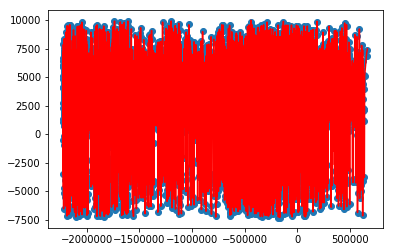

In [17]:
# plot

XX = lowX_train[:,-1]
plt.scatter(np.sort(XX) ,lowy_train)
plt.plot(np.sort(XX) ,lowY_hat ,color='red');
plt.show()

In [18]:

highX_train, highX_test, highy_train, highy_test = train_test_split(
    X, high, test_size=0.1, random_state=0)

In [19]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:15]]


# X=X._values
# y=y._values

LRmodel.fit(highX_train, highy_train)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
highY_hat = LRmodel.predict(highX_train)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(highX_train))}).join(pd.DataFrame(highX_train))
dfDirty = newX+0.00001*np.random.rand(len(newX['Constant']), 13)
newX = dfDirty
RSS= sum((highy_train-highY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((highy_train-Y_bar)**2)
MSE = (sum((highy_train - highY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(highX_train))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 112002093.13038266
MSE : 6332.452825825898
   Coefficient Names  Coefficient  Std. Error  t-statistic  P-value
0          Intercept  -83040.0648      20.513    -4048.237    0.000
1               Open   96066.3139     428.912      223.977    0.000
2                 Ma    1919.0475  146234.457        0.013    0.990
3                Rsi       2.7177       0.164       16.585    0.000
4                CCI       0.2372       0.010       24.522    0.000
5                adx      -0.0290       0.065       -0.447    0.655
6               Macd  -28239.0563    1199.391      -23.545    0.000
7                atr   41434.8418    1285.274       32.238    0.000
8            Chaiken      -0.0000       0.000       -1.986    0.047
9            HighLow      -0.0001       0.000       -2.744    0.006
10          Aligator    1919.0487  146231.018        0.013    0.990
11                AC  -13638.6014     821.017      -16.612    0.000
12                AD      -0.0000       0.000       -0.862    0.388

In [21]:
highData = []
highData = pd.DataFrame(highX_train)
highData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken', 'HighLow', 'Aligator', 'AC', 'AD']
highData['Actual High'] = highy_train
highData['Predicted High'] = highY_hat
highData.to_csv('High data prediction.csv',index=False)

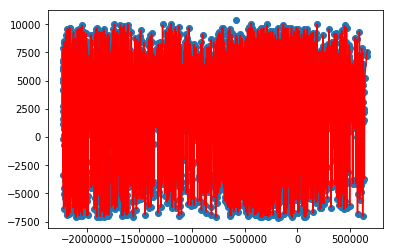

In [22]:
# plot

XX = highX_train[:,-1]
plt.scatter(np.sort(XX) ,highy_train)
plt.plot(np.sort(XX) ,highY_hat ,color='red');
plt.show()

In [23]:
meanX_train, meanX_test, meany_train, meany_test = train_test_split(
    X, mean, test_size=0.1, random_state=0)

In [24]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:15]]


# X=X._values
# y=y._values

LRmodel.fit(meanX_train, meany_train)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
meanY_hat = LRmodel.predict(meanX_train)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(meanX_train))}).join(pd.DataFrame(meanX_train))
dfDirty = newX+0.00001*np.random.rand(len(newX['Constant']), 13)
newX = dfDirty
RSS= sum((meany_train-meanY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((meany_train-Y_bar)**2)
MSE = (sum((meany_train - meanY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(meanX_train))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 43607484.37376607
MSE : 2465.5105090612356
   Coefficient Names  Coefficient  Std. Error  t-statistic  P-value
0          Intercept  -83062.0445      12.799    -6489.971    0.000
1               Open   88915.0640     267.631      332.230    0.000
2                 Ma    5522.0277   91491.713        0.060    0.952
3                Rsi       1.6724       0.102       16.356    0.000
4                CCI       0.2523       0.006       41.813    0.000
5                adx      -0.0269       0.040       -0.665    0.506
6               Macd   -8804.1265     748.459      -11.763    0.000
7                atr   10444.7013     802.112       13.022    0.000
8            Chaiken       0.0000       0.000        3.289    0.001
9            HighLow      -0.0003       0.000       -8.359    0.000
10          Aligator    5522.0282   91490.250        0.060    0.952
11                AC   -3323.7630     512.306       -6.488    0.000
12                AD       0.0000       0.000        0.516    0.606

In [ ]:
meanData = []
meanData = pd.DataFrame(meanX_train)
meanData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken', 'HighLow', 'Aligator', 'AC', 'AD']
meanData['Actual Mean'] = meany_train
meanData['Predicted Mean'] = meanY_hat
meanData.to_csv('Mean data prediction.csv',index=False)

17700 17700


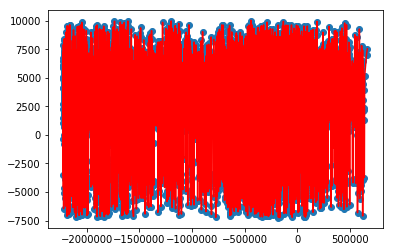

In [25]:
# plot

XX = meanX_train[:,-1]
print(len(np.sort(XX)), len(meany_train))
plt.scatter(np.sort(XX) ,meany_train)
plt.plot(np.sort(XX) ,meanY_hat ,color='red');
plt.show()

In [28]:

print(len(meanY_hat), len(low))

gg = np.sum(meanY_hat >= lowy_train)
print(gg)

17700 19667
16678


In [29]:
gg1 = np.sum(meanY_hat <= highy_train)
print(gg1)

16786


In [30]:
highg = np.sum(highY_hat >=highy_train)
print(highg)

10812


In [31]:
lowg = np.sum(lowY_hat < lowy_train)
print(lowg)

10999


In [32]:
print(meanY_hat)

[6516.71746315 -465.32014047 1385.15476389 ... 5156.17355221 7151.04324725
 7542.05435001]
